# Fatals Police Shooting In The USA Analysis
### Sagi Polaczek
#### -14 September 2020- 


# Introduction
Police brutality is one of the most hot topics in the USA nowdays.  
In this notebook we'll explore the data set of fatal police shooting in the US.


## Data Set
The dataset (fps_data.csv) was obtained from The Washington Post's repository.  
The Post's dataset contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.  
The dataset describes 15 details about each killing, and is documenting only those shootings in which a police officer, in the line of duty, shoots and kills a civilian.  


# Preliminaries:  
In this project we'll use the following python packages:

In [30]:
# Importing libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Importing two useful functions 
from statistics import median, mean

Lets import the data as a Pandas's DataFrame and take a first look:

In [14]:
fps_data = pd.read_csv('./data/fps_data.csv', index_col = 'id')
print("\nThis dataset contains %d rows." %fps_data.shape[0])
print("\nThe dataset's columns:", ', '.join(list(fps_data.columns)))
fps_data.head()


This dataset contains 5624 rows.

The dataset's columns: name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera, longitude, latitude, is_geocoding_exact


,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
id,,,,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Exploring missing and unique values:

In [15]:
print(fps_data.isnull().sum())

name                       209
date                         0
manner_of_death              0
armed                      212
age                        252
gender                       1
race                       591
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       276
body_camera                  0
longitude                  272
latitude                   272
is_geocoding_exact           0
dtype: int64


Because the dataset has a total of 5624 rows, we are not concern by the missing values.   
Furthermore, in this project we focus on data exploration and visualization and not on building a prediction model, so we won't touch those missing values.     

# Data Exploration
We'll start explored the data for each feature individually and ask some interesting questions.


## Date
Is there an increase in the number of fatal police shooting? Maybe a decrease? Maybe the shooting distribute unequally through the months of the year?

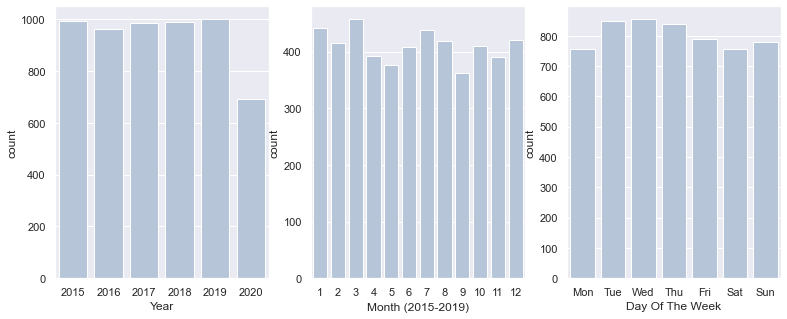

In [16]:
# Converting the date dtype from 'object' to 'datetime'
fps_data['date'] = pd.to_datetime(fps_data['date'], infer_datetime_format=True)


fps_years = fps_data['date'].dt.year
# Droped 2020 because the data is missing for September, October, November and December
fps_months = fps_data['date'].loc[fps_data['date'].dt.year != 2020].dt.month
fps_days = fps_data['date'].dt.dayofweek

# 
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plotting the graphs
fig, axs = plt.subplots(ncols=3, figsize=(13,5))
ax0 = sns.countplot(fps_years, ax=axs[0], color='lightsteelblue').set_xlabel('Year')
ax1 = sns.countplot(fps_months, ax=axs[1], color='lightsteelblue').set_xlabel('Month (2015-2019)')
ax2 = sns.countplot(fps_days, ax=axs[2], color='lightsteelblue').set(xlabel='Day Of The Week', xticklabels=days_of_week)






* Years: 
    There is no such a difference between the years 2015-2019. And by the amount of shooting and the part of the year we at, it not seems that 2020 will be any different, despite all the media exposure and movements like 'Black Lives Matter'.   
* Months:
    The months distribution varry a lot. Because we have only four years, we can't determine if there is any pattern. However, the gap between March and September is significant. It can be due weather or maybe national holidays.  
* Days of the week: There a more fatal encounters in the weekdays in comparison to weekends and mondays. I suggest it because there are less police forces in duty through the weekends and fewer people out of homes, and therfore less encounters in general, which causes less fatal encounters.
    


## Age
What is the victim's age distribution? What is the avrage victim's age?

The victim's age median is: 35.0
The victim's age mean is: 37.142405063291136


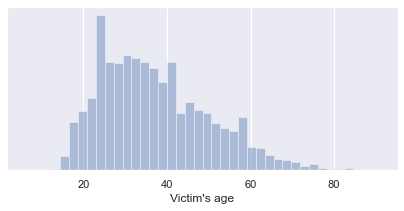

In [17]:
age_values = fps_data['age'].dropna().values
plt.figure(figsize=(7,3))
g = sns.distplot(age_values, axlabel="Victim's age", kde=False)
g.set(yticks=[])
sns.set(style="darkgrid", font_scale=1)

age_median = median(age_values)
age_mean = mean(age_values)

print("The victim's age median is:", age_median)
print("The victim's age mean is:", age_mean)



As we can see, the vast majority of the victims are young - in there 20's, 30's and early 40's.


## Manner Of Death

<AxesSubplot:ylabel='count'>

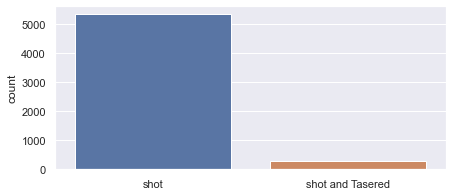

In [18]:
plt.figure(figsize=(7,3))
manner_values = fps_data['manner_of_death'].values
sns.countplot(manner_values)

As the graph suggests, the majority of the victims were only shoted.  
Clearly the police forces using the taser gun more a gunfire.  
So why this is happening?  

We can rase assumptions like:  
1. When a police officer uses the taser gun, the suspect should be paralyzed. So usually there is no need for a gunshot when taser is used.  
2. In some encounters, the suspects might be armed and dangerous, so taser gun is not an option to neutralize the threat. Thus the forces only shot.

Are we going to find a relation between the manner of death and any other feature?  
Maybe race? Age? Or even date? 

## Gender

<AxesSubplot:ylabel='count'>

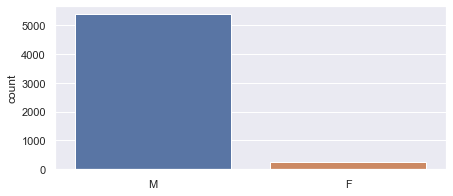

In [19]:
plt.figure(figsize=(7,3))
gender_values = fps_data['gender'].dropna().values
sns.countplot(gender_values)

This graph correlates with [the data](https://en.wikipedia.org/wiki/Sex_differences_in_crime#In_the_United_States) that the majority of crimes in the US are made by men, and correlates the common assumption that usually men are more threatening then women.

## Armed
Is the victim tend to be armed? Which weapons the victims had?   

The word cloud image below represents the frequencies of the weapons which held by the subjects.   
The bigger the word, the more times it appears in the data.

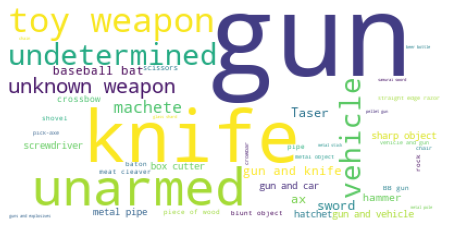


There are 95 unique armed values


In [20]:
# Importing a libary for the word cloud plot
from wordcloud import WordCloud



# Getting the frequencies for the armed values, and plotting
arms_freq = fps_data['armed'].dropna().value_counts().to_dict()
cloud = WordCloud(background_color='white').generate_from_frequencies(arms_freq)
plt.figure(figsize=(9,4))
plt.imshow(cloud)
plt.axis('off')
plt.show()


armed_unique = fps_data['armed'].dropna().unique()
print("\nThere are %d unique armed values" %len(armed_unique))


While the most common weapons which the subjects held are guns and knifes, there are much who’ve been unarmed. Moreover, the variety of weapons is pretty large and a lot of them was mentioned less than five times. 

## Race
Movements in the US like 'Black Lives Matter' are protesting against police brutality against black people. Are they right? Is is true that mostly black people are being killed by police? Or its what the media shows up? Lets explore the race data.  

Note: We drop the none values, which represent an unknown race for a victim.

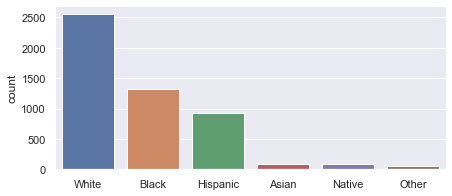

In [21]:
# Values & Settings preparation
race_values = fps_data['race'].dropna().values
order = ['W', 'B', 'H', 'A', 'N', 'O']
races = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']

# Plotting
plt.figure(figsize=(7,3))
ax_race = sns.countplot(race_values, order=order).set(xticklabels=races)

So clearly much more white people died of fatal shooting then any other race. But the cause can be the population ratio between the races. Lets investigate the ratio between the amount of the victims to the total population (by race).

We got our estimates for the total population by race in the USA from a [national source](https://www.census.gov/quickfacts/fact/table/US/RHI125219#RHI125219).


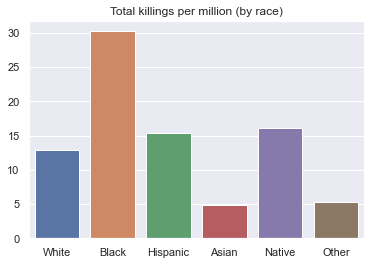

In [22]:
# Population precents by race dictionary 
population_precent_dict = {'White': 60.1, 'Black': 13.4, 'Hispanic': 18.5, 'Asian': 5.9, 'Native': 1.5, 'Other': 2.7}

# Total population by race dictionary
total_population = 328_239_523
population_dict = {race:int((population_precent_dict[race] * total_population) //100) for race in races}

# Total killing by race dictionary
total_shooting_by_race = fps_data['race'].dropna().value_counts()
total_shooting_by_race.index = races
race_shooting_dict = total_shooting_by_race.to_dict()

# Total killing per million by race dictionary 
proportional_shooting_race = {race:round((race_shooting_dict[race] / population_dict[race])*1_000_000, 2) for race in races}

# Ploting the graph
proportional_shooting_race = pd.Series(proportional_shooting_race)
ax_race_per_million = sns.barplot(x=proportional_shooting_race.index, y=proportional_shooting_race.values).set_title('Total killings per million (by race)')


Black people killed by the police at least twice the rate than any other race, while asians have a low fatal encounters rate compared to the others.

Later on we'll try to cross data attributes to, possibly, gain more conclusions about race differentiations.


## Location

Are there any differences between the states/cities? Or maybe the killing spreads evenly?

Because the population size vary a lot between states, we'll represent the ratio between the total killing from 2015, to the total population by given state. Similar to what we did a graph above.


**Data Source:** [State Population Total](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html)

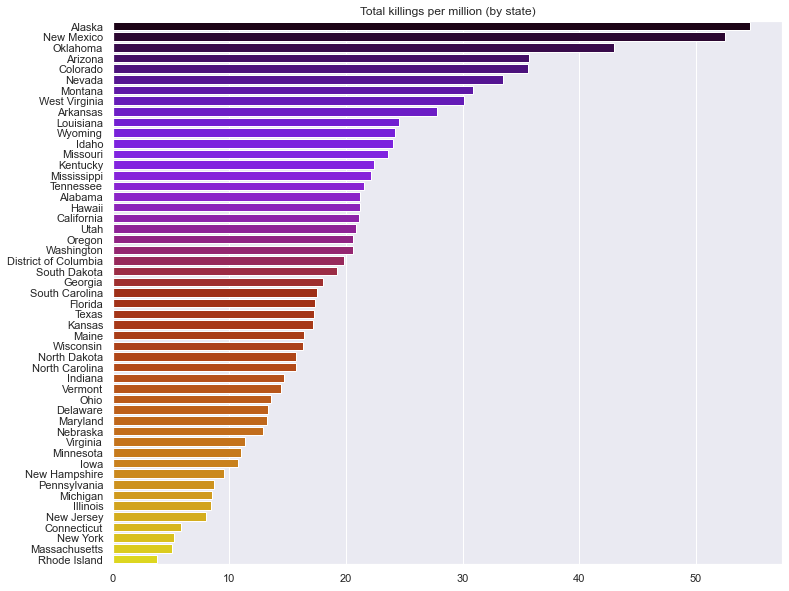


In Alaska there are 14.48 times more killings than Rhode Island!


In [36]:
# Total killing by state
state_total_killings = fps_data['state'].value_counts()

# Total population data
pop_data_raw = pd.read_csv('data/pop_data.csv')
state_total_population = pop_data_raw.loc[:,['NAME', 'POPESTIMATE2019']]

# State abbreviated form dictionay (We'll need to access data more easily)

# TEMPORARY NOTE: I'm intending to minimise all the code blocks. Else, I'll move the dictionary to another file. 
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

####
# Arrange data
state_total_population.drop(index=range(5), inplace=True)
state_total_population.set_index('NAME', inplace=True)
state_total_killings.rename(us_state_abbrev, inplace=True)


# Killings/Population ratio data
state_ratio_kp = {state:state_total_killings.loc[state]/state_total_population.loc[state].values[0]*1_000_000
                         for state in state_total_killings.index}
state_ratio_kp = pd.Series(state_ratio_kp).sort_values(ascending=False)


# Plotting
plt.figure(figsize=(12,10))
ax_state_per_million = sns.barplot(y=state_ratio_kp.index, x=state_ratio_kp.values, palette='gnuplot').set(title='Total killings per million (by state)')
plt.show()

# Stressing the difference by printing the ratio between the maximum and minimum values
max_ratio = state_ratio_kp.iloc[0]
min_ratio = state_ratio_kp.iloc[-1]

country_max_ratio = list(state_ratio_kp.index)[0]
country_min_ratio = list(state_ratio_kp.index)[-1]

times_bigger = round(max_ratio/min_ratio, 2)

print(f"\nIn {country_max_ratio} there are {times_bigger} times more killings than {country_min_ratio}!")



As the graph suggests, the police fatal shooting distributes unevenly through the states.  

Such graph raises a lot of questions. Lets mention a few:  
1. Is there a correlation between the amount of killings and: area size, population size, population demographics, guns own by civilians, etc.  
2. Is the different states as different guidelines for law enforcement? How does it affect if any?  
3. How the court handles with such cases? Is there a punishment for injustice shooting?  
4. Does the education system stress different values in different states? Does it relate?




## Flee, Body Camera, Threat Level

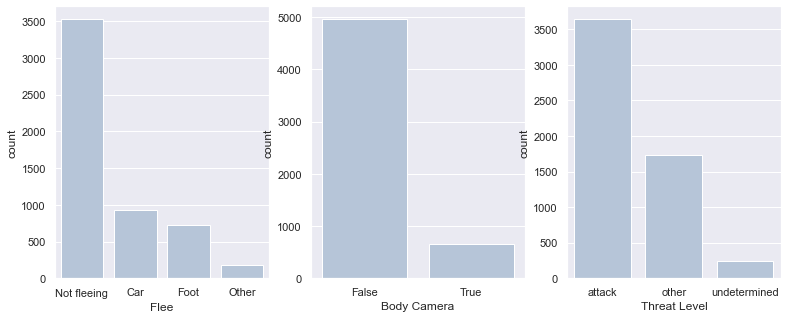

In [41]:
# Plotting the graphs
fig, axs = plt.subplots(ncols=3, figsize=(13,5))
ax3 = sns.countplot(fps_data['flee'], ax=axs[0], color='lightsteelblue').set_xlabel('Flee')
ax4 = sns.countplot(fps_data['body_camera'], ax=axs[1], color='lightsteelblue').set_xlabel('Body Camera')
ax5 = sns.countplot(fps_data['threat_level'], ax=axs[2], color='lightsteelblue').set_xlabel('Threat Level')


Those graphs are pretty much straightforward.  

Interesing to notice that the vast majory of the police forces **did not have a body camera**. We short in data to declare on a correlation between the two, but the question which automatically raises is: Does police officers with a body camera are less tend to use brutal force? 


